In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pickel_dir_path = "YOUR_PATH\\data\\pickels_v2"

means_data = pd.read_pickle(f"{pickel_dir_path}\\aggregated_car_data_2016_from_day_32_3_weeks_means.pkl")

In [18]:
mbd = means_data["mean_both_directions"]

In [22]:
sums = []
for i in range(mbd.shape[0]):
  sum = np.sum(mbd.iloc[i])
  sums.append(sum)

In [42]:
sums_n = np.array(sums)
low_traffic_indices = np.where(sums_n < 288*5)

In [47]:
listified = list(low_traffic_indices[0])
low_traffic = means_data.iloc[listified]

In [66]:
high_traffic_df = means_data.reset_index().drop(listified)

In [67]:
high_traffic_df

,lamId,lamIds,day_indices,mean_both_directions,mean_dir_1,mean_dir_2
0,1,1,32,"[4.205426356589147, 5.065217391304347, 4.78623...","[4.666666666666667, 9.333333333333334, 6.33333...","[3.0, 6.666666666666667, 7.0, 3.0, 3.333333333..."
1,99,99,32,"[9.713178294573643, 9.032608695652174, 8.47826...","[9.666666666666666, 7.666666666666667, 9.66666...","[15.666666666666666, 13.333333333333334, 10.33..."
2,102,102,32,"[4.426356589147287, 4.75, 4.634057971014492, 4...","[5.666666666666667, 6.0, 9.0, 7.33333333333333...","[3.0, 6.0, 2.3333333333333335, 8.6666666666666..."
3,103,103,32,"[7.1434108527131785, 7.278985507246377, 7.2028...","[7.666666666666667, 5.333333333333333, 12.0, 1...","[5.666666666666667, 10.333333333333334, 4.6666..."
4,104,104,32,"[5.135658914728682, 5.22463768115942, 5.003623...","[9.666666666666666, 8.666666666666666, 6.33333...","[2.0, 3.0, 4.0, 2.3333333333333335, 3.66666666..."
...,...,...,...,...,...,...
387,1603,1603,32,"[3.22093023255814, 3.3804347826086962, 2.42028...","[5.666666666666667, 8.0, 3.0, 3.33333333333333...","[3.3333333333333335, 2.0, 0.6666666666666666, ..."
388,1604,1604,32,"[3.8682170542635657, 3.4565217391304346, 2.847...","[6.333333333333333, 6.0, 4.666666666666667, 1....","[5.333333333333333, 3.0, 1.3333333333333333, 0..."
389,1605,1605,32,"[3.0426356589147288, 3.0905797101449277, 2.684...","[4.333333333333333, 4.0, 1.3333333333333333, 5...","[2.3333333333333335, 4.333333333333333, 3.6666..."
390,1606,1606,32,"[3.1589147286821704, 3.278985507246377, 3.4637...","[3.0, 3.0, 2.6666666666666665, 6.3333333333333...","[1.6666666666666667, 3.6666666666666665, 5.0, ..."


In [68]:
high_traffic_df.to_pickle(f"{pickel_dir_path}\\aggregated_car_data_2016_from_day_32_3_weeks_means_low_traffic_removed.pkl")

In [69]:
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

C:\Users\Mikko\anaconda3\envs\gradu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [95]:
seed = 1
transformed_data = to_time_series_dataset(high_traffic_df["mean_dir_2"].to_numpy())
scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(transformed_data)

In [96]:
kshape = KShape(3, random_state=seed)
preds_kshape = kshape.fit_predict(scaled)

In [97]:
high_traffic_df["lamIds"].values

array([   1,   99,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  114,  115,  116,  117,  118,  119,  122,  123,  124,
        125,  126,  127,  128,  129,  130,  131,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        149,  150,  151,  152,  153,  155,  156,  159,  160,  162,  163,
        164,  165,  167,  168,  169,  175,  176,  177,  178,  179,  184,
        185,  186,  187,  188,  189,  190,  191,  192,  193,  194,  195,
        196,  197,  198,  203,  204,  205,  206,  207,  208,  209,  210,
        211,  221,  223,  224,  226,  227,  230,  231,  232,  233,  234,
        235,  237,  238,  239,  240,  242,  243,  244,  245,  247,  248,
        249,  251,  252,  254,  257,  302,  303,  304,  305,  401,  403,
        404,  405,  406,  407,  408,  421,  422,  424,  425,  426,  428,
        429,  430,  431,  432,  433,  435,  436,  437,  438,  439,  440,
        441,  442,  443,  445,  446,  447,  448,  4

In [98]:
preds_kshape

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,

IndexError: index 3 is out of bounds for axis 0 with size 3

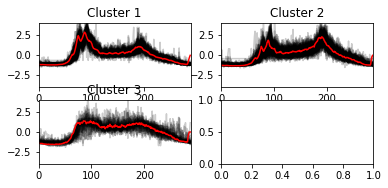

In [99]:
plt.figure()
for yi in range(5):
    plt.subplot(3, 2, 1 + yi)
    for xx in scaled[preds_kshape == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(kshape.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, scaled.shape[1])
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()